In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

iris = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(iris.shape)
print(iris.columns)
print(iris['species'].value_counts())

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


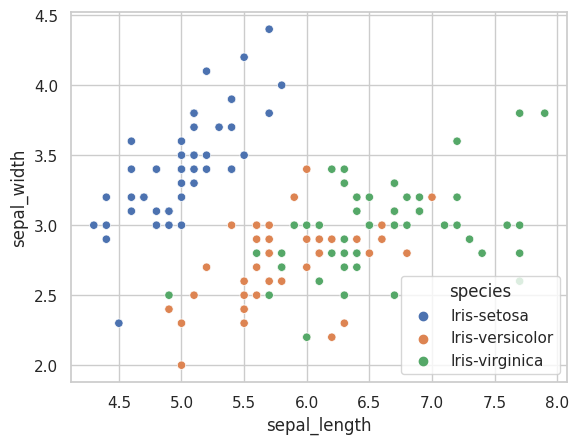

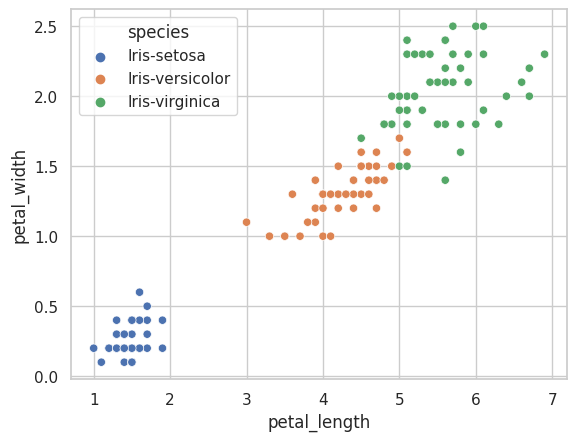

In [4]:
sns.set(style='whitegrid')
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()
sns.scatterplot(iris, x='petal_length', y='petal_width', hue='species')
plt.show()

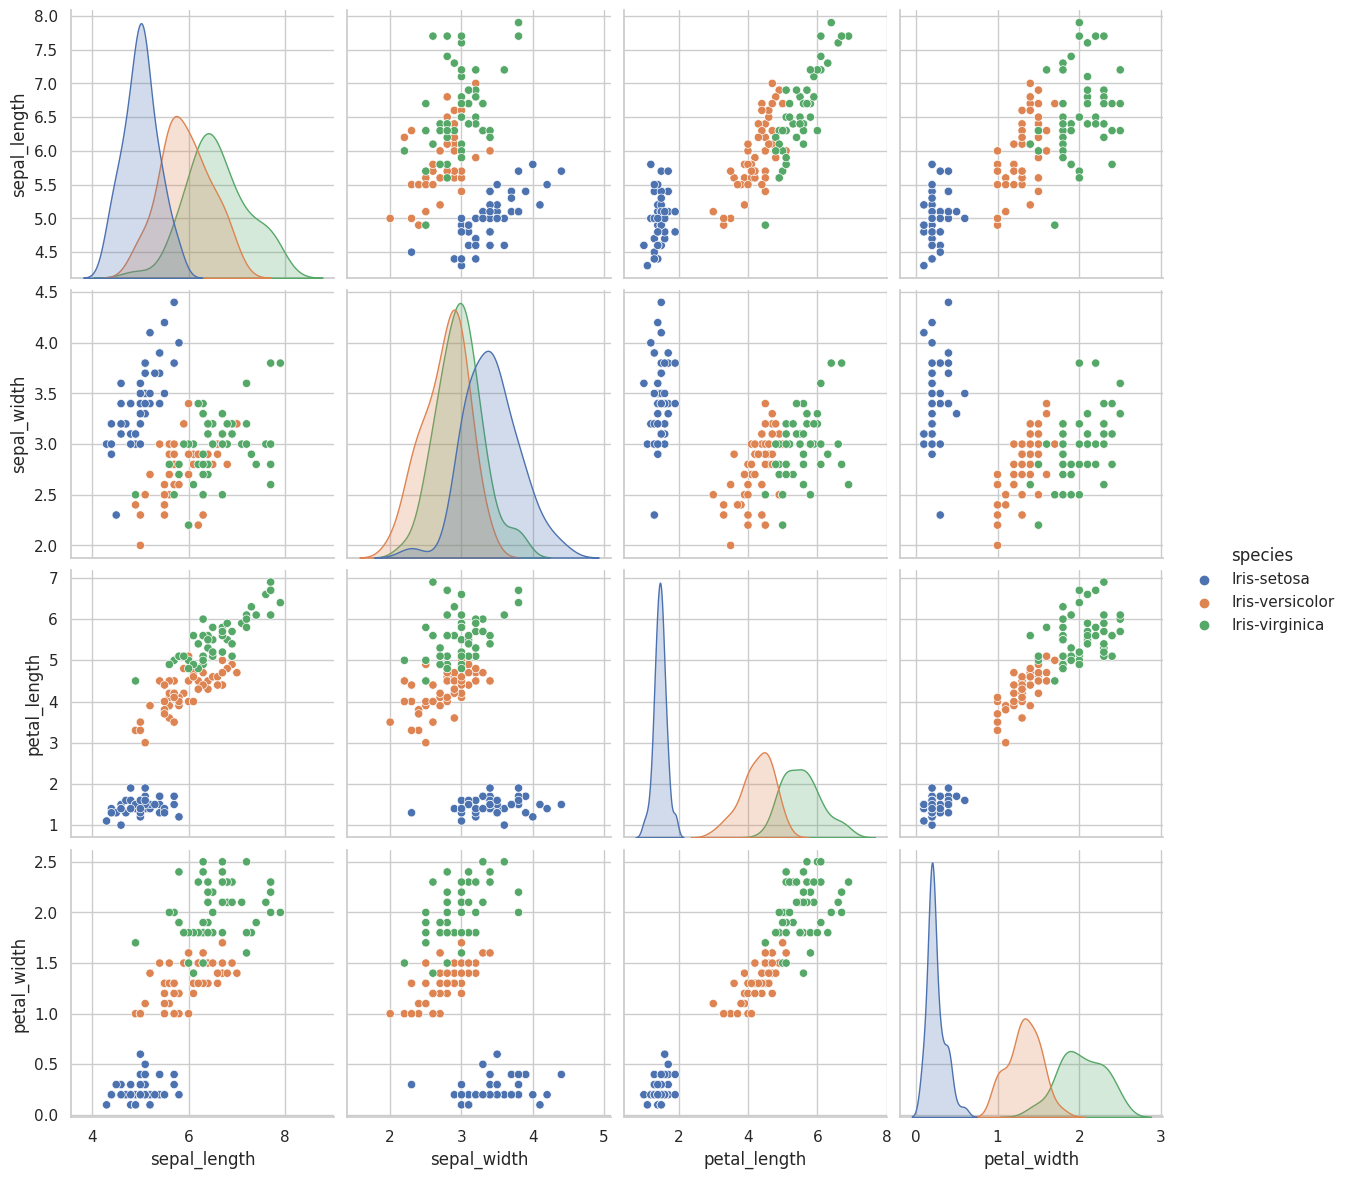

In [5]:
sns.pairplot(iris,hue="species",height=3)
plt.show()

In [6]:
X = iris.drop('species', axis=1)
Y = iris.species
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21, stratify = Y)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Accuracy of the knn classifier on test data is: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of the knn classifier on test data is: 0.98


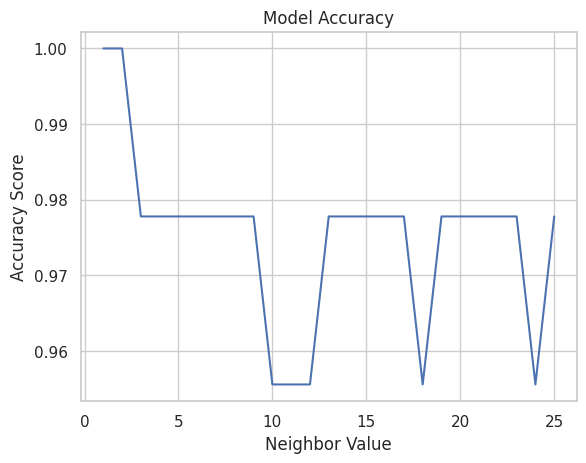

In [9]:
from sklearn.metrics import accuracy_score

scores = []
neighbors_range = range(1, 26)

for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, Y)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(neighbors_range, scores)
plt.xlabel('Neighbor Value')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy')
plt.show()

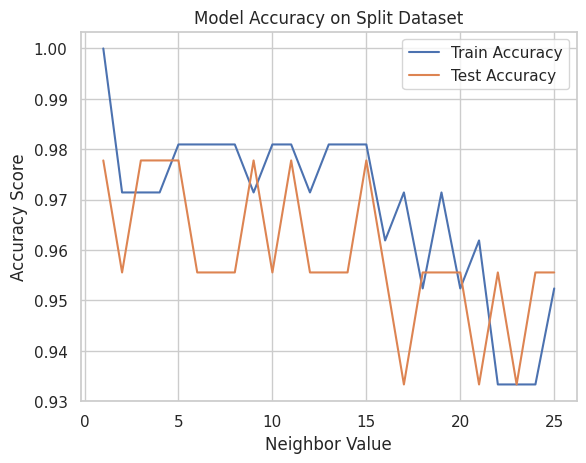

In [10]:
train_accuracies = []
test_accuracies = []
k_range = range(1, 26)

for neighbor in k_range:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(x_test, y_test))

plt.plot(k_range, train_accuracies, label='Train Accuracy')
plt.plot(k_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Neighbor Value')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy on Split Dataset')
plt.legend()
plt.show()